# Notes

**Description:** takes a pdf, finds the text, and produces a word cloud
<br>
<br>

**Requirements:**<br>
`pip install PyPDF2`<br>
`pip install nltk`<br>
`pip install wordcloud`<br>
`pip install collection`<br>


**Optional install:** (if not using PyPDF2 -- but didn't work out of the box):<br>
`pip install textract`
<br>
<br>


**References** (initial starting point) <br>

>**Note:** references are old and needed updates (included below) to fix issues
* [datascience article](https://towardsdatascience.com/pdfs-to-word-cloud-in-3-steps-73ccbff6d835)<br>
* [tutorial](https://github.com/Lakshmi-1212/wordcloud_from_docs/blob/main/wordcloud_generator.ipynb)<br>



# Setup

In [1]:
import os
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
import PyPDF2
# import textract #not used -- couldn't get this to work right out of the box

In [2]:
#first time downloads
firstTime = False
if firstTime:
    nltk.download('punkt') #C:\Users\<username>\AppData\Roaming\nltk_data  #windows paths (not done on my unix box)
    nltk.download('stopwords') #C:\Users\<username>\AppData\Roaming\nltk_data

# Read Text from PDF file

In [3]:
#method 1 -- couldn't get this to work right out of the box
def read_file_textract(filepath):
    text = textract.process(filepath)
    return text.decode("utf-8") 


In [4]:
#method 2 -- worked after some simple updates

#updated version
def read_file_pypdf(filepath):
    pdfFileObj = open(filepath,'rb')
    pdfReader = PyPDF2.PdfReader(pdfFileObj) #updated
    num_pages = len(pdfReader.pages) #updated
    text = ""
    # Read all the pages
    for pg in range(num_pages):
        page = pdfReader.pages[pg] #updated
        text += page.extract_text() #updated
         
    return text  

#deprecated original version
def read_file_pypdf_deprecated(filepath):
    pdfFileObj = open(filepath,'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)#deprecated
    num_pages = pdfReader.numPages #deprecated
    text = ""
    # Read all the pages
    for pg in range(num_pages):
        page = pdfReader.getPage(pg) #deprecated
        text += page.extractText() #deprecated
         
    return text  

# Identify the Keywords

In [5]:
def extract_keywords(text, ignore_words = [],
                     min_word_length = 0,
                     ignore_numbers = True,
                     ignore_case = True):
    # Remove words with special characters
    filtered_text = ''.join(filter(lambda x:x in string.printable, text))
    
    # Create word tokens from the text string
    tokens = word_tokenize(filtered_text)
    
    # List of punctuations to be ignored 
    punctuations = ['(',')',';',':','[',']',',','.','--','-','#','!','*','"','%']
    
    # Get the stopwords list to be ignored
    stop_words = stopwords.words('english')

    # Convert ignore words from user to lower case
    ignore_words_lower = [x.lower() for x in ignore_words]
    
    # Combine all the words to be ignored
    all_ignored_words = punctuations + stop_words + ignore_words_lower
    
    # Get the keywords list
    keywords = [word for word in tokens \
                    if  word.lower() not in all_ignored_words
                    and len(word) >= min_word_length]    

    # Remove keywords with only digits
    if ignore_numbers:
        keywords = [keyword for keyword in keywords if not keyword.isdigit()]

    # Return all keywords in lower case if case is not of significance
    if ignore_case:
        keywords = [keyword.lower() for keyword in keywords]
    
    return keywords

# Create the Word Cloud

In [6]:
def create_word_cloud(keywords, maximum_words = 100, bg = 'white', cmap='Dark2',
                     maximum_font_size = 256, width = 3000, height = 2000,
                     random_state = 42, fig_w = 15, fig_h = 10, output_filepath = None):
    
    # Convert keywords to dictionary with values and its occurences
    word_cloud_dict=Counter(keywords) #fixed spelling from tutorial

    wordcloud = WordCloud(background_color=bg, max_words=maximum_words, colormap=cmap, 
                          stopwords=STOPWORDS, max_font_size=maximum_font_size,
                          random_state=random_state, 
                          width=width, height=height).generate_from_frequencies(word_cloud_dict)
    
    plt.figure(figsize=(fig_w,fig_h))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    if output_filepath:
        plt.savefig(output_filepath, bbox_inches='tight')
    plt.show()
    plt.close()

# Main -- Make Word Clouds for A Single File

In [7]:
filepath = 'reading\Kuhn-SSR-2ndEd.pdf' #filepath on windows machine, not typical unix box paths
#filepath = 'reading\STS_Emery.pdf'

file_text = read_file_pypdf(filepath)




In [8]:
outputfile = 'results\wordcloud.jpg'
#keywords = extract_keywords(file_text,min_word_length = 3)

ignore_words = ['Fig','like','e.g.','i.e.','one','vol','also']
keywords = extract_keywords(file_text,min_word_length = 4, ignore_words = ignore_words)


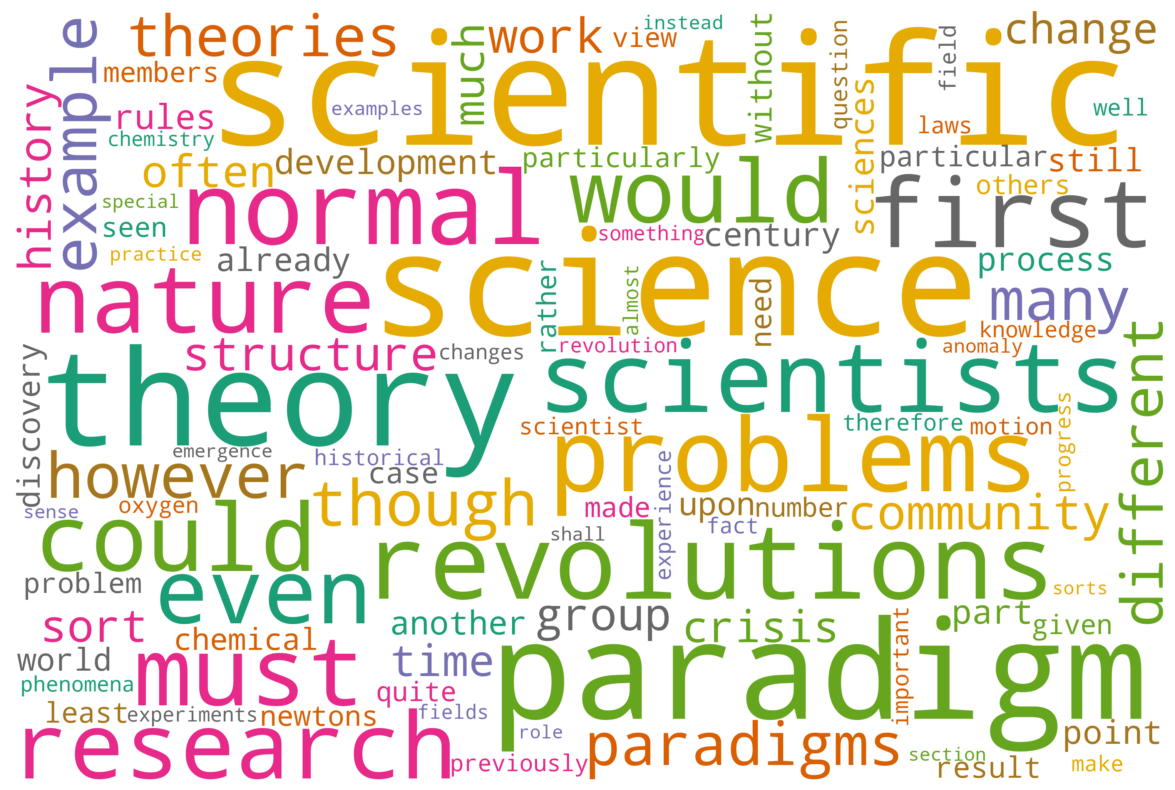

In [9]:
create_word_cloud(keywords, maximum_words=100, maximum_font_size = 400, output_filepath = outputfile)


# Main -- Make Word Clouds for Each File in a Folder

Parsing file: Kuhn-SSR-2ndEd.pdf





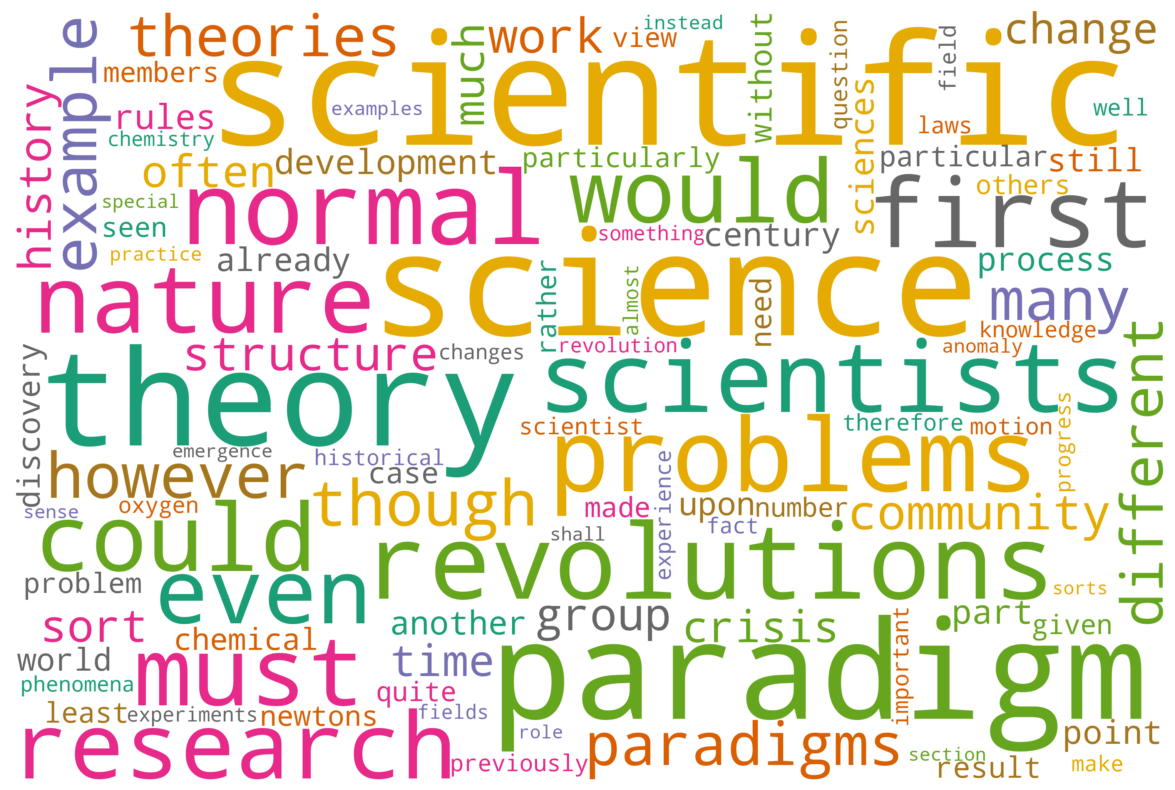

Parsing file: STS_Emery.pdf





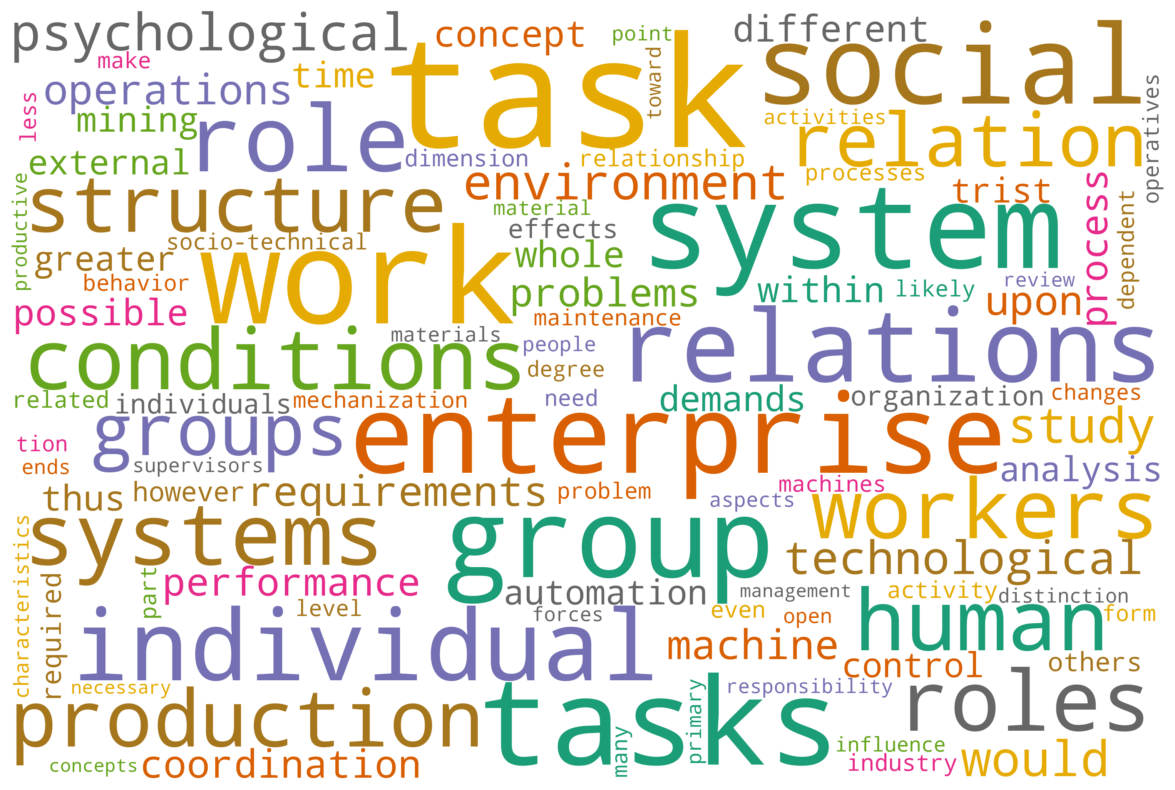

Completed reading all pdf files in folder:reading





In [10]:
docs_path = 'reading'

ignore_words = ['Fig','like','e.g.','i.e.','one','vol','also']
all_keywords = []

for filename in os.listdir(docs_path):
    filepath = os.path.join(docs_path, filename)
    if os.path.isfile(filepath) and filename.endswith('.pdf'):
        print(f'Parsing file: {filename}\n\n\n')
        try:
            file_text = read_file_pypdf(filepath)
            keywords = extract_keywords(file_text,min_word_length = 4, ignore_words = ignore_words)
            outputfile = 'results\wordcloud_' + filename + '.jpg'
            create_word_cloud(keywords, maximum_words=100, maximum_font_size = 400, output_filepath = outputfile)
            #all_keywords.extend(keywords)  #or append words across files if you want one cloud for multiple files
        except:
            print(f'ERROR!!! Unable to parse file: {filename}. Ignoring file!!')
        

print(f'Completed reading all pdf files in folder:{docs_path}\n\n\n')